# Lab 1 - Perception Learning Rule

In this lab the goal is to classify the input vectors into the correct classes using the perception learning rule

## Network Architecture
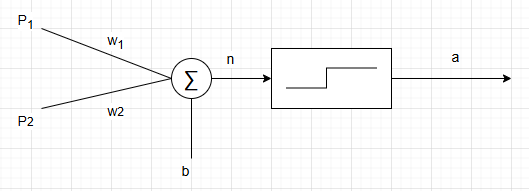

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs

This section defines the variables needed for the perception learning algorithm. This includes the inputs (2 inputs per output), the expected outputs (1 or 0 depending on the expected class), weights, bias, actual output, and the error

In [6]:
p = np.array([[1, 2, 3, 1, 2, 4], [4, 5, 3.5, 0.5, 2, 0.5]]) # Inputs
t = np.array([1, 1, 1, 0, 0, 0]) # Expected outputs
w = [0, 0] # Weight vector
b = 0 # Bias
a = 0 # Output from hardlim function
e = 0 # error (t - a)
flags = [1] * len(t) # Array of flags all initialized to set

In [7]:
while(1 in flags): # While there is a point incorrectly classified
    flags = [1] * len(t) # Reset all flags as we need to recheck the expected and actual outputs match for all inputs
    for k in range(0, len(flags)): # Run the perception learning rule on each input
        hardlim_input = (w[0] * p[0][k]) + (w[1] * p[1][k]) + b # input to the hardlimit is wp + b
        # If else represents the hard limit rule
        if hardlim_input >= 0: 
            a = 1
        else:
            a = 0
        e = t[k] - a # Check the actual versus expected outputs
        if e == 0: # If the point is correctly classified clear the flag
            flags[k] = 0
        else: # If incorrect, update the weights and bias accordingly
            w[0] = w[0] + e * p[0][k]
            w[1] = w[1] + e * p[1][k]
            b = b + e
       

print("Final Weight: " + str(w))
print("Final bias: " + str(b))

# Split the input points into two classes based on output
class1 = p[:, t == 1]
class2 = p[:, t == 0]





Final Weight: [np.float64(-4.0), np.float64(5.0)]
Final bias: -4


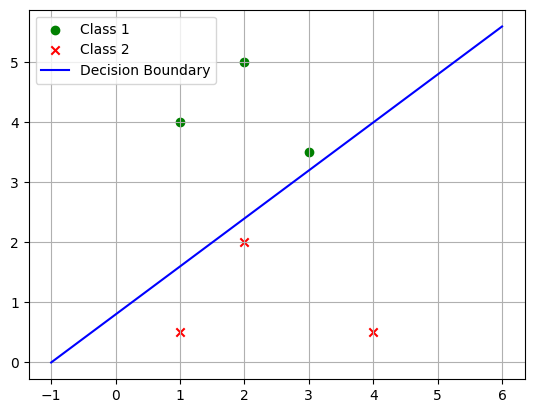

In [8]:
plt.scatter(class1[0], class1[1], marker="o", label="Class 1", color="green")
plt.scatter(class2[0], class2[1], marker="x",label="Class 2", color="red")



# Initialize the decision boundary to be between -1 and 6
x = [-1, 0, 1, 2, 3, 4, 5, 6]
y = [0] * len(x)

# Find the y for each x using the final weights and biases
for i in range(0, len(x)):
    y[i] = -1 * (w[0] * x[i] + b) / w[1]

# Plot the points and the decision boundary to show that the points were correctly seperated
plt.plot(x, y, color="blue", label="Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()